# Data 620 | Assignment 4.2 | High Frequency Words

Please answer the following questions in an IPython Notebook, posted to Github.

1- Choose a corpus of interest
2- How many total unique words are in the corpus?
3- Taking the most common words, how many unique words represent half of the total words in the corpus?
4- Identify the 200 highest frequency words in this corpus.
5- Create a graph that shows the relative frequency of these 200 words
6- DOes the observed relative frequency of these words follow Zipf's law? Explain
7- In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

Group members: Vijaya Cherukuri, Abdellah Ait Elmouden, Priya Shaji, Habib Khan

In [113]:
# loading libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import re
#import nltk
#import string
#import urllib
from wordcloud import WordCloud, STOPWORDS

# Impeachment Inquiry 

In this project, we decided to take the impeachment inquiry of President Trump that was going on last year and data was taken using Twitter's API. The data was processed and saved into csv using R. For now we will get the tweets and extract the high frequency words out of the file.

In [88]:
# loading the file
url = 'https://raw.githubusercontent.com/habibkhan89/Data620/master/Week%204%20-%20Part%202%20Assignment/Yankees%20-%20HK/tweets_freq.csv'
df = pd.read_csv(url, usecols = ['word', 'freq'])
df

,word,freq
0,ukraine,169
1,impeachment,153
2,trump,134
3,whistleblower,133
4,aid,42
...,...,...
1929,httpstcopaekrnwfi,1
1930,withhold,1
1931,httpstcoyauhtxeq,1
1932,httpstcokoyuiymrj,1


# How many total unique words are in the corpus?

In [89]:
print("Total unique words in corpus is ", len(df['word']))

Total unique words in corpus is  1934


The tweet file has 1934 unique words

# Taking the most common words, how many unique words represent half of the total words in corpus?

In [90]:
total = df.freq.sum()
total

4536

In [91]:
half = int(total/2)
half

2268

In [92]:
running_total = np.cumsum(df.freq)
running_total = list(running_total)
df['running_total'] = running_total

df_tophalf = df.loc[df['running_total'] < half]
df_tophalf

,word,freq,running_total
0,ukraine,169,169
1,impeachment,153,322
2,trump,134,456
3,whistleblower,133,589
4,aid,42,631
...,...,...,...
141,volodymyr,4,2250
142,zel<U+0085>,4,2254
143,now,4,2258
144,release,4,2262


In [93]:
row = len(df_tophalf)
row

146

146 words make the top half words out of total of 4,536 words from the tweets. 

# Identify the 200 highest frequency words in the corpus

In [94]:
top200 = df.iloc[0:200, 0:2]
top200

,word,freq
0,ukraine,169
1,impeachment,153
2,trump,134
3,whistleblower,133
4,aid,42
...,...,...
195,called,3
196,months,3
197,revealed,3
198,withheld,3


Ukraine, impeachment, trump, whistleblower and aid are the most frequently using words in the corpus.

# Create a graph that shows the relative frequency of these 200 words

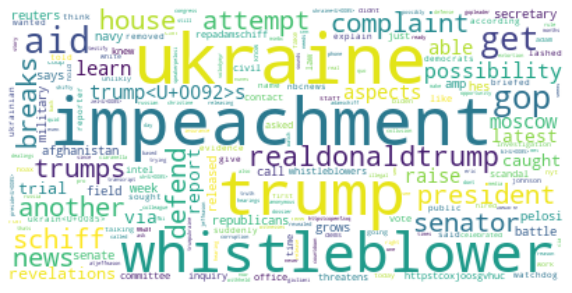

In [132]:
# Creating dictionary 
d = {}
for a, x in top200.values:
    d[a] = x

# Creating wordcloud
wordcloud= WordCloud(background_color="white", max_font_size=50)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Does the observed relative frequency of these words follow Zipf's law? Explain

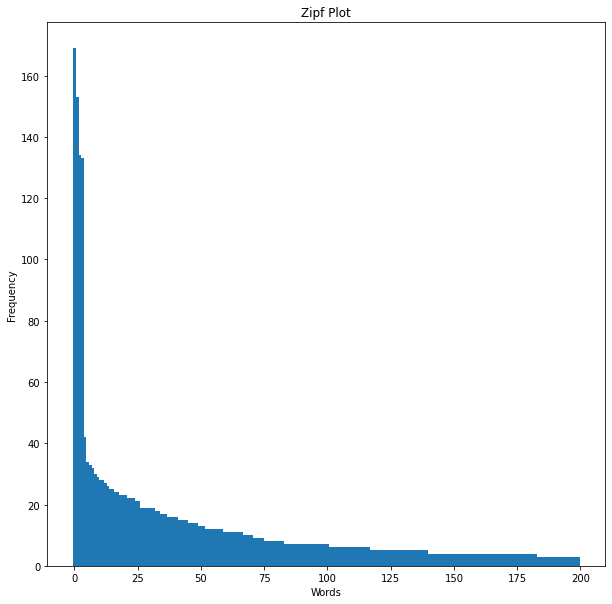

<Figure size 720x720 with 0 Axes>

In [161]:
plt.bar(top200.index, top200.freq, width=1.5)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Zipf Plot')
plt.figure(figsize=(10,10))
#plt.xticks(rotation=70)
plt.show()

It seems that the corpus is following the Zipf Law as each word is almost half as frequent as the word before it. 

# In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

Most of the punctuations, stopwords and mostly using English words such as and, or, etc were already removed from the file in R using corpus package. Other than that part, I think it represents "all words in all corpora" as the corpus is already following Zipf Law. 